# 内容提要
### 1.继承
### 2.多态
_____
____

## 1.继承

### 1）继承和实例化
红虚线表示继承 __ bases __ ，黑实线表示实例化 __ class __
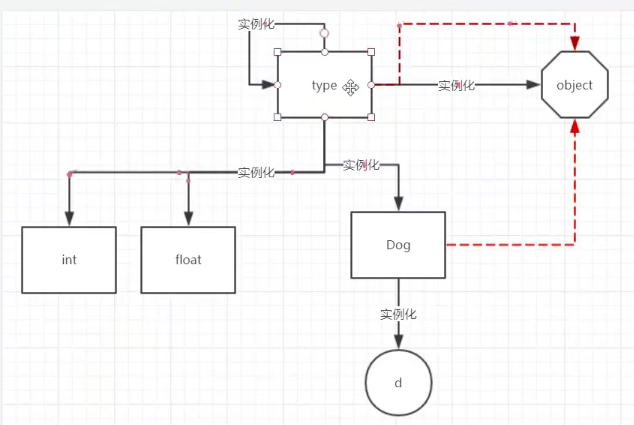

### 2）继承的几种形式
第三张图，两个继承链之间有公共的d, 故有重叠  
一个类继承多个，互相用逗号隔开  
  
比如找一个属性
第二种：先从左侧继承链逐个向上找，若没有，则找右侧继承链  
第三种：顺序是A,B,C,D
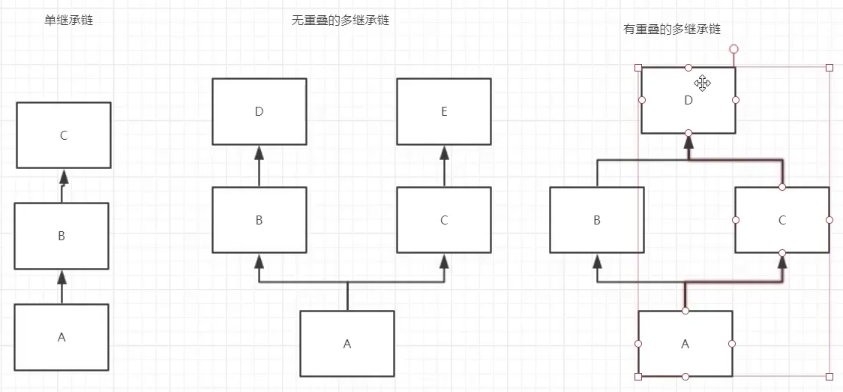

In [4]:
# 找继承顺序(第二种)
import inspect

class D(object):
    pass

class E(object):
    pass

class C(E):
    pass

class B(D):
    pass

class A(B,C):
    pass

print(inspect.getmro(A))

(<class '__main__.A'>, <class '__main__.B'>, <class '__main__.D'>, <class '__main__.C'>, <class '__main__.E'>, <class 'object'>)


In [5]:
# 找继承顺序 (第三种)
import inspect

class D(object):
    pass

class B(D):
    pass

class C(D):
    pass

class A(B,C):
    pass

print(inspect.getmro(A))

(<class '__main__.A'>, <class '__main__.B'>, <class '__main__.C'>, <class '__main__.D'>, <class 'object'>)


找拓扑的方式
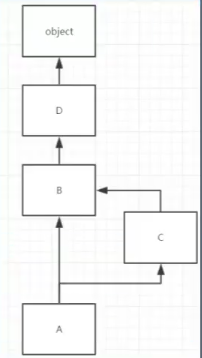

In [8]:
# 上图的继承方式（要按拓扑排序来，类似的）

import inspect

class D(object):
    pass

class B(D):
    pass

class C(B):
    pass

class A(C,B):    # 写成B,C就报错。 因为去掉A,只有C的入度为0
    pass

print(inspect.getmro(A))

(<class '__main__.A'>, <class '__main__.C'>, <class '__main__.B'>, <class '__main__.D'>, <class 'object'>)


### 3）属性和方法的继承
python中继承的只是资源的使用权，并没有多复制一份

In [19]:
class A(object):
    b = 2
    def __init__(self):
        self.a = 1

class B(A):
    pass

ob1 = B()

print(ob1.__dict__)                                 #打印对象属性，父类的属性被继承过来
print(ob1.__class__.__dict__)                       #这是打印自身类的属性
print(ob1.__class__.__bases__[0].__dict__)          #b出现了
print(ob1.b)                                        #类属性被继承过来
print(B.b)

{'a': 1}
{'__module__': '__main__', '__doc__': None}
{'__module__': '__main__', 'b': 2, '__init__': <function A.__init__ at 0x10a0e9c10>, '__dict__': <attribute '__dict__' of 'A' objects>, '__weakref__': <attribute '__weakref__' of 'A' objects>, '__doc__': None}
2
2


In [27]:
class A(object):
    def __init__(self):
        self.a = [1,2,3]
        print("--",id(self.a),"--")

class B(A):
    pass

ob1 = B()
ob2 = B()

print(id(ob1.a), id(ob2.a))  #这俩地址不一样 （容器对象）
ob1.a.append(7)
print(id(ob1.a), id(ob2.a))

print(ob1.__dict__)
print(ob2.__dict__)

-- 4461324096 --
-- 4459251328 --
4461324096 4459251328
4461324096 4459251328
{'a': [1, 2, 3, 7]}
{'a': [1, 2, 3]}


In [28]:
class A(object):
    def __init__(self):
        self.a = 1000000
        print("--",id(self.a),"--")

class B(A):
    pass

ob1 = B()
ob2 = B()

print(id(ob1.a), id(ob2.a))  #这俩地址一样的（同一份？）
ob1.a = 878666
print(id(ob1.a), id(ob2.a))

print(ob1.__dict__)
print(ob2.__dict__)

-- 4453932720 --
-- 4453932720 --
4453932720 4453932720
4453930448 4453932720
{'a': 878666}
{'a': 1000000}


In [29]:
i = 1000000
j = 1000000
print(id(i), id(j))         #这俩地址不一样

4453932368 4453932432


In [30]:
class A(object):
    def __init__(self):
        self.a = 1

class B(A):
    def __init__(self):    # 子类加了这个之后，就不会执行父类的__init__了
        pass

ob1 = B()
ob2 = B()

print(ob1.__dict__)

{}


In [35]:
# 正确做法是在子类的 __init__函数中加上 super().__init__()
# 或者写

import inspect

class D(object):
    def __init__(self):
        self.d = 4


class B(D):
    def __init__(self):
        self.b = 2
        super().__init__()
        


class C(D):
    def __init__(self):
        self.c = 3
        super().__init__()
    pass
       
class A(B,C):
    def __init__(self):
        self.a = 1
        super().__init__()
        

m = A()
print(m.__dict__)

{'a': 1, 'b': 2, 'c': 3, 'd': 4}


## 2.多态

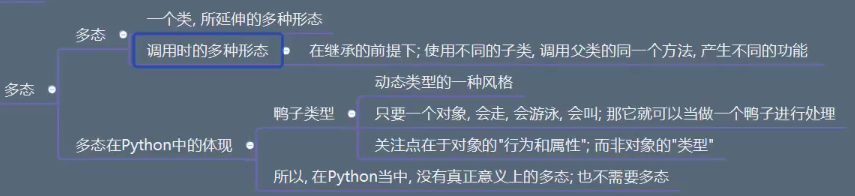

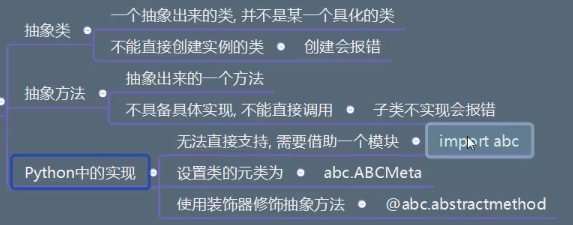

In [39]:
# 抽象类实现方式见下

import abc

class Animal(object, metaclass = abc.ABCMeta):
    @abc.abstractmethod
    def eat_food(self):
        pass
    
    def say_hello(self):
        print("~~hello~~")
    
class Cat(Animal):
    def eat_food(self):
        print("Eat fish")
    pass

# a = Animal()                 # Can't instantiate abstract class Animal with abstract methods eat_food
c = Cat()
c.eat_food()                   # Cat中必须实现抽象方法
c.say_hello()


Eat fish
~~hello~~
